In [ ]:

from google.colab import files
files.upload()

Saving Medicalpremium.csv to Medicalpremium.csv


{'Medicalpremium.csv': b'Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice\r\n45,0,0,0,0,155,57,0,0,0,25000\r\n60,1,0,0,0,180,73,0,0,0,29000\r\n36,1,1,0,0,158,59,0,0,1,23000\r\n52,1,1,0,1,183,93,0,0,2,28000\r\n38,0,0,0,1,166,88,0,0,1,23000\r\n30,0,0,0,0,160,69,1,0,1,23000\r\n33,0,0,0,0,150,54,0,0,0,21000\r\n23,0,0,0,0,181,79,1,0,0,15000\r\n48,1,0,0,0,169,74,1,0,0,23000\r\n38,0,0,0,0,182,93,0,0,0,23000\r\n60,0,1,0,0,175,74,0,0,2,28000\r\n66,1,0,0,0,186,67,0,0,0,25000\r\n24,0,0,0,0,178,57,1,0,1,15000\r\n46,0,1,0,0,184,97,0,0,0,35000\r\n18,0,0,1,0,150,76,0,0,1,15000\r\n38,0,0,0,0,160,68,1,0,1,23000\r\n42,0,0,0,1,149,67,0,0,0,30000\r\n38,1,0,0,0,154,82,0,0,0,23000\r\n57,1,0,0,0,156,61,0,0,0,25000\r\n21,0,1,0,0,186,97,0,0,0,15000\r\n49,1,0,0,0,160,97,0,0,2,28000\r\n20,1,0,0,0,181,81,0,0,0,15000\r\n35,0,0,0,0,163,92,0,0,1,32000\r\n35,0,1,0,0,175,83,0,0,1,23000\r\n53,0,1,0,0,151,97,0,1,

In [64]:
#Importing All the libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.model_selection import train_test_split
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
dataset=pd.read_csv("Medicalpremium.csv")

In [ ]:
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
dataset.shape


(986, 11)

In [ ]:
dataset.columns


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
dataset.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [ ]:
#dropping duplicate values

dataset.drop_duplicates()
dataset.shape

(986, 11)

The good part of the dataset is that all the features are of same data type and there is no null values and No duplicate values.

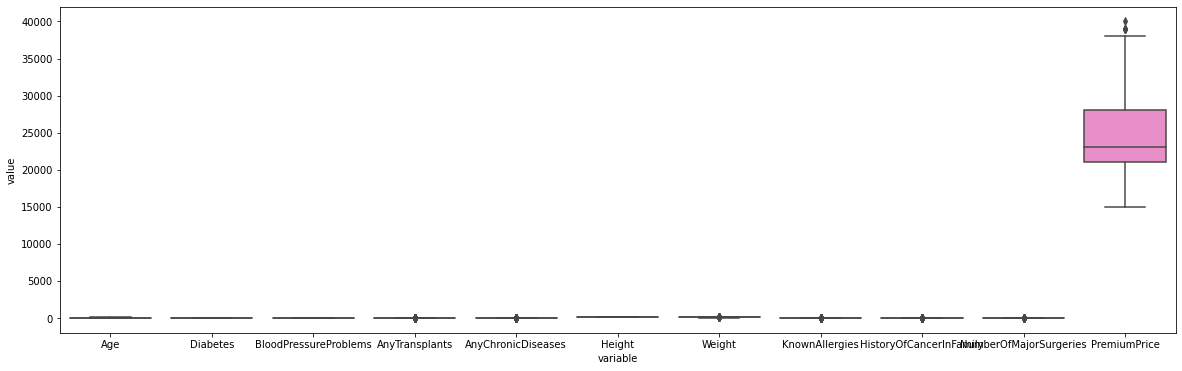

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(dataset))

plt.show()

From above figure the boxplot is not clear for all features except for Premium Price.  Let's check for other 3 features i.e for Age, Weight and Height because these have more value range as other features are just binary.

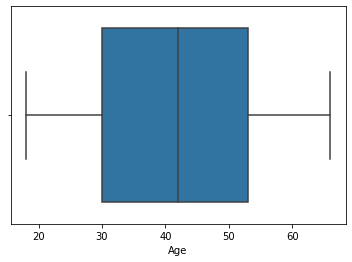

In [ ]:
sns.boxplot(x="Age", data=dataset)

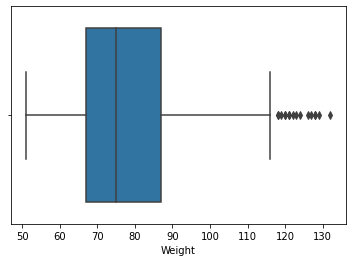

In [ ]:

sns.boxplot(x="Weight", data=dataset)

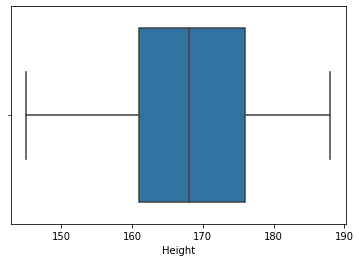

In [ ]:
sns.boxplot(x="Height", data=dataset)

Looking at above figures the weight feature has lot of outliers. Let's apply Log transformation. Because we have less number of rows hence we cannot remove these outliers which will affect the dataset. This Log transformation will transform data to normal or close to normal. 


In [ ]:
dataset["Weight"]= np.log(dataset["Weight"])


In [ ]:
dataset["Weight"].head()

0    4.043051
1    4.290459
2    4.077537
3    4.532599
4    4.477337
Name: Weight, dtype: float64

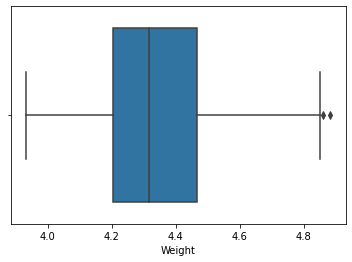

In [ ]:

sns.boxplot(x="Weight", data=dataset)

From the above figure we can see that the number of outlier present in the weight feature is reduced and Premium price feature has very few outliers. Let's move forward with this dataset and check for the results.

In [ ]:
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,4.043051,0,0,0,25000
1,60,1,0,0,0,180,4.290459,0,0,0,29000
2,36,1,1,0,0,158,4.077537,0,0,1,23000
3,52,1,1,0,1,183,4.532599,0,0,2,28000
4,38,0,0,0,1,166,4.477337,0,0,1,23000


**Data Visualization:**

Let's visualize how the data is distributed

Text(0.5, 1.0, 'Count of Age ranges')

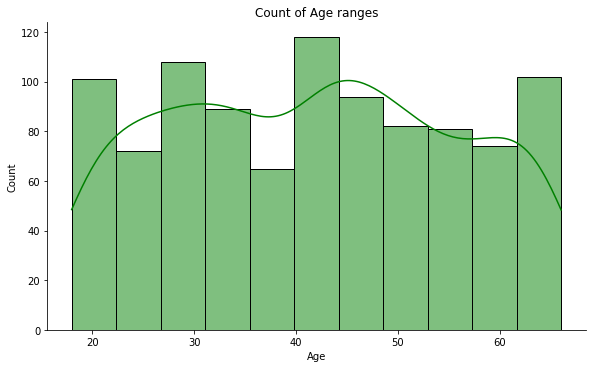

In [ ]:

sns.displot(x='Age',data=dataset,kde=True,aspect=10/6,color="g")
plt.title("Count of Age ranges")

#distplot is distribution plot
#x= variable That specifies x axis position 
#data is the dataset name which has all the variables
#kde: A kernel density estimate which is analagous to a histogram.
#aspect is the size of figure
#color is parameter which mentions color  given to plot

From the above figure we can say the maximum nunmber of people who are paying premium are those  who have age between 40 to 50 years. In a same way people who have age between 35 to 40 are those who are less number of premium.

Text(0.5, 1.0, 'Count of Premium price ranges')

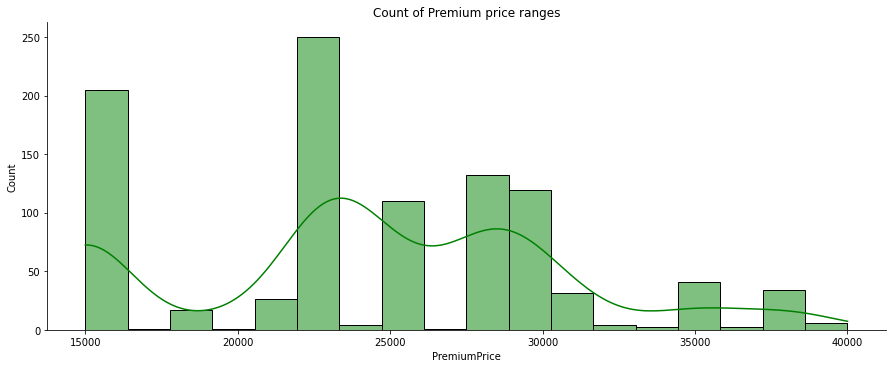

In [ ]:

sns.displot(x='PremiumPrice',data=dataset,kde=True,aspect=15/6,color="g")
plt.title("Count of Premium price ranges")
#distplot is distribution plot
#x= variable That specifies x axis position 
#data is the dataset name which has all the variables
#kde: A kernel density estimate which is analagous to a histogram.
#aspect is the size of figure
#color is parameter which mentions color  given to plot

From above fig we can approximately  say that the more number of people are paying the premium amount between 23500 to 24500. And very few members are paying the premium amount of 20000 and around 27000. 

Text(0.5, 1.0, 'Count of KnownAllergies')

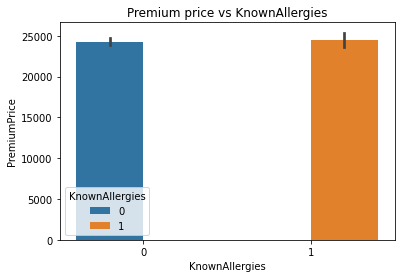

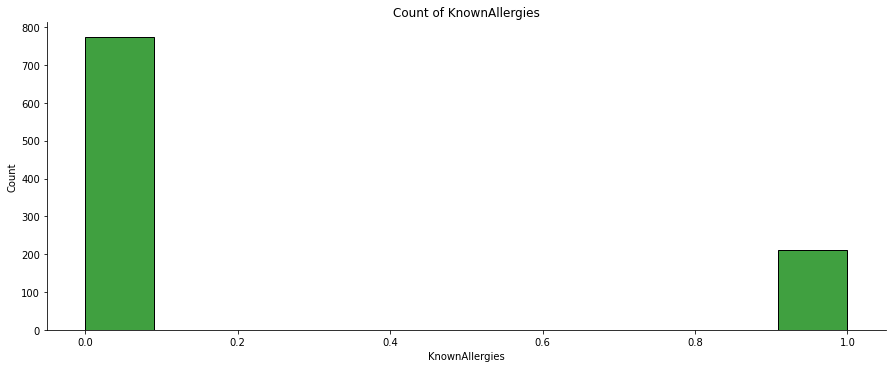

In [ ]:

sns.barplot(x='KnownAllergies',y="PremiumPrice",data=dataset,hue='KnownAllergies')

#x is variable to be plotted on x-axis
#y is variable to be plotted on y-axis
#data is the dataset which has all the features
#hue is also name of variables in dataset

plt.title("Premium price vs KnownAllergies")

sns.displot(x='KnownAllergies',data=dataset,aspect=15/6,color="g")
plt.title("Count of KnownAllergies")

From above 2 figures we can say that the Knownallergy feature is not much effecting to decide the premium price as both like people who have allergy and who don't have allergy are paying almost same premiumPrice. But It is very clear More people who are doesn't have any knownallergy are paying the premium amount.

Text(0.5, 1.0, 'Count of Diabetes patients')

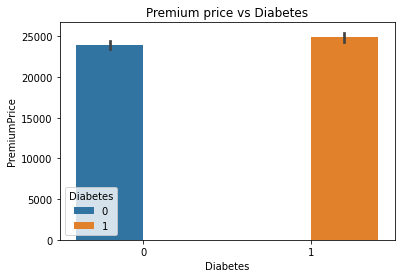

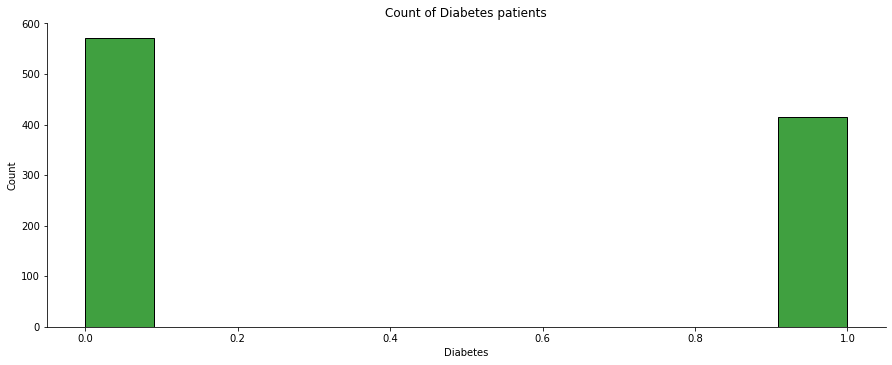

In [ ]:

sns.barplot(x='Diabetes',y="PremiumPrice",data=dataset,hue='Diabetes')
plt.title("Premium price vs Diabetes")
#x is variable to be plotted on x-axis
#y is variable to be plotted on y-axis
#data is the dataset which has all the features
#hue is also name of variables in dataset

sns.displot(x='Diabetes',data=dataset,aspect=15/6,color="g")
plt.title("Count of Diabetes patients")

From above figure we can say also that the Diabetes feature is not effecting  very much to decide the premium price but there is very slight difference as people who have diabetes are taking little high premium amount as compared to people who doesn't have diabetes. But there is no much difference. But from second figure it is clear that  more number of people who don't have diabetes are paying premiums.

Text(0.5, 1.0, 'Count of people who have HistoryOfCancerInFamily ')

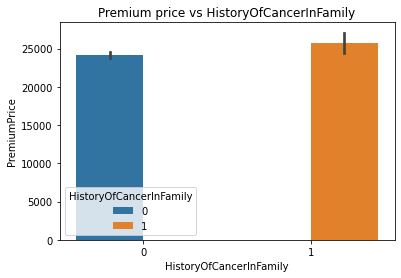

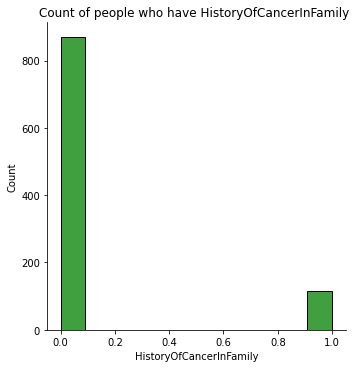

In [ ]:
sns.barplot(x='HistoryOfCancerInFamily',y="PremiumPrice",data=dataset,hue='HistoryOfCancerInFamily')
plt.title("Premium price vs HistoryOfCancerInFamily")
#x is variable to be plotted on x-axis
#y is variable to be plotted on y-axis
#data is the dataset which has all the features
#hue is also name of variables in dataset

sns.displot(x='HistoryOfCancerInFamily',data=dataset,color="g")
plt.title("Count of people who have HistoryOfCancerInFamily ")

From above figures we can say also that the  HistoryOfCancerInFamily feature is not effecting  very much to decide the premium price but there is very slight difference as people who have HistoryOfCancerInFamily are taking little high premium amount as compared to people who doesn't have HistoryOfCancerInFamily. But there is no much difference. But from second figure it is clear that  very high number of people who don't have HistoryOfCancerInFamily are paying premiums.

Text(0.5, 1.0, 'Count of NumberOfMajorSurgeries')

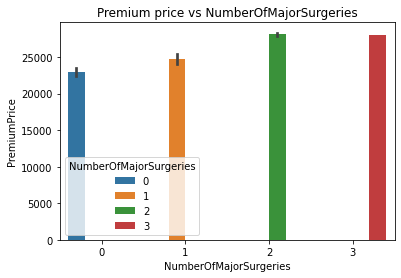

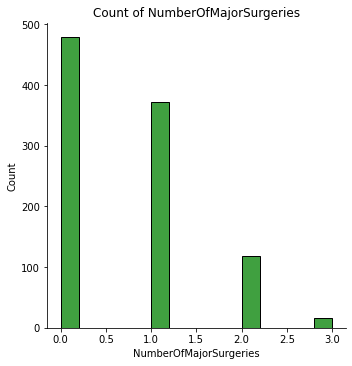

In [ ]:
sns.barplot(x='NumberOfMajorSurgeries',y="PremiumPrice",data=dataset,hue='NumberOfMajorSurgeries')
plt.title("Premium price vs NumberOfMajorSurgeries")
#x is variable to be plotted on x-axis
#y is variable to be plotted on y-axis
#data is the dataset which has all the features
#hue is also name of variables in dataset
sns.displot(x='NumberOfMajorSurgeries',data=dataset,color="g")
plt.title("Count of NumberOfMajorSurgeries")

From above figures we can say  that the  people who has 2 or 3 major surgeries are paying the premium amount of more than 25000. But from second figure it is very clear that most of the people who have 0 number surgeries are paying the premium.

Text(0.5, 1.0, 'Count of people having BloodPressureProblems')

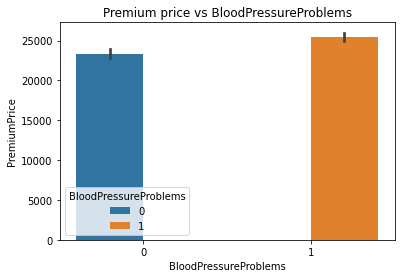

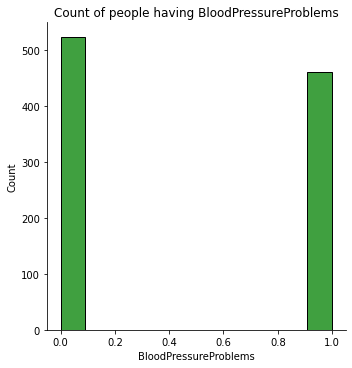

In [ ]:

sns.barplot(x='BloodPressureProblems',y="PremiumPrice",data=dataset,hue='BloodPressureProblems')
plt.title("Premium price vs BloodPressureProblems")
sns.displot(x='BloodPressureProblems',data=dataset,color="g")
plt.title("Count of people having BloodPressureProblems")

From above figures we can say also that the  BloodPressureProblems feature is not effecting  very much to decide the premium price but there is very slight difference as people who have BloodPressureProblems are paying little high premium amount as compared to people who doesn't have BloodPressureProblems. But there is no much difference. But from second figure it is clear that slightly higher number of people who don't have BloodPressureProblems are paying premiums.

From above all the figures we can see that we create other features by using Age and Premium price. Because remaining features are not much effecting the premium price.

Features are created by dividing age and premium price columns into groups like Age colums is divided as Teen, Yound, Middle, Old, and Oldest and Premium Price is divided like kind of salary bins such as Low, Basic, Average, High, Superhigh. 

In [ ]:
#Creating a list of lables for Premium Price
pr_label= ['Low', 'Basic', 'Average', 'High', 'Superhigh']
dataset["Premium_lable"]=pd.cut(dataset["PremiumPrice"], bins=5, labels=pr_label)
#pd.cut takes the column given and group the column into number given in the bins paramter and assigns the labels as give in the labels parameter.
dataset.head(5)


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Premium_lable
0,45,0,0,0,0,155,4.043051,0,0,0,25000,Basic
1,60,1,0,0,0,180,4.290459,0,0,0,29000,Average
2,36,1,1,0,0,158,4.077537,0,0,1,23000,Basic
3,52,1,1,0,1,183,4.532599,0,0,2,28000,Average
4,38,0,0,0,1,166,4.477337,0,0,1,23000,Basic


In [ ]:
#Creating a list of lables for Page
pr_label= ['Teen', 'Young', 'Middle', 'Old', 'Oldest']
dataset["Age_Label"]=pd.cut(dataset["Age"], bins=5, labels=pr_label)
#pd.cut takes the column given and group the column into number given in the bins paramter and assigns the labels as give in the labels parameter.
dataset.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Premium_lable,Age_Label
0,45,0,0,0,0,155,4.043051,0,0,0,25000,Basic,Middle
1,60,1,0,0,0,180,4.290459,0,0,0,29000,Average,Oldest
2,36,1,1,0,0,158,4.077537,0,0,1,23000,Basic,Young
3,52,1,1,0,1,183,4.532599,0,0,2,28000,Average,Old
4,38,0,0,0,1,166,4.477337,0,0,1,23000,Basic,Middle
5,30,0,0,0,0,160,4.234107,1,0,1,23000,Basic,Young
6,33,0,0,0,0,150,3.988984,0,0,0,21000,Basic,Young
7,23,0,0,0,0,181,4.369448,1,0,0,15000,Low,Teen
8,48,1,0,0,0,169,4.304065,1,0,0,23000,Basic,Old
9,38,0,0,0,0,182,4.532599,0,0,0,23000,Basic,Middle


In [ ]:
#Let's look are columns now
dataset.columns
#We have created 2 Categorical features.

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Premium_lable', 'Age_Label'],
      dtype='object')

Before Going for Next process let's Visualize these bins which are created.

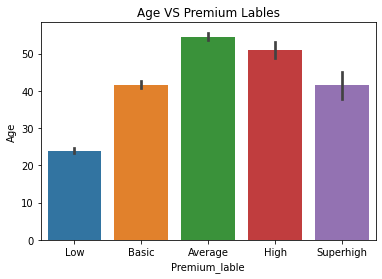

In [ ]:
plt.title("Age VS Premium Lables")
sns.barplot(x='Premium_lable',y="Age",data=dataset)
#x is variable to be plotted on x-axis
#y is variable to be plotted on y-axis
#data is the dataset which has all the features


From the above figure we can say that the premium price that is categorized in the Low label were taken by the people who have age around 22 and that is the least as compared to other lables. And Most of the people who have age around 50+ are paying the premium price that are grouped under Average label.

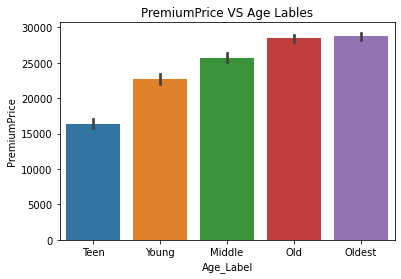

In [ ]:
plt.title("PremiumPrice VS Age Lables")

sns.barplot(x='Age_Label',y="PremiumPrice",data=dataset)

From above figure it's very clear that most of the old and oldest people are paying More premium price.

Now Let's convert these categorical data into numerical data as it is required for the further process.

In [ ]:
new_dataset=pd.get_dummies(data=dataset,columns=['Age_Label','Premium_lable'])
#pd.get_dummies get's the data from dataframe and chooses the columns which are given column parameter, encode data and 
#return the Dummy variables corresponding to values of the Series.
new_dataset.columns


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Age_Label_Teen', 'Age_Label_Young', 'Age_Label_Middle',
       'Age_Label_Old', 'Age_Label_Oldest', 'Premium_lable_Low',
       'Premium_lable_Basic', 'Premium_lable_Average', 'Premium_lable_High',
       'Premium_lable_Superhigh'],
      dtype='object')

In [ ]:
new_dataset.shape

(986, 21)

In [ ]:
new_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Age_Label_Teen,Age_Label_Young,Age_Label_Middle,Age_Label_Old,Age_Label_Oldest,Premium_lable_Low,Premium_lable_Basic,Premium_lable_Average,Premium_lable_High,Premium_lable_Superhigh
0,45,0,0,0,0,155,4.043051,0,0,0,25000,0,0,1,0,0,0,1,0,0,0
1,60,1,0,0,0,180,4.290459,0,0,0,29000,0,0,0,0,1,0,0,1,0,0
2,36,1,1,0,0,158,4.077537,0,0,1,23000,0,1,0,0,0,0,1,0,0,0
3,52,1,1,0,1,183,4.532599,0,0,2,28000,0,0,0,1,0,0,0,1,0,0
4,38,0,0,0,1,166,4.477337,0,0,1,23000,0,0,1,0,0,0,1,0,0,0


**Data Splitting and Scalling**

In [ ]:
#seperating feature and target variable
x=new_dataset.drop('PremiumPrice',axis=1)
y=new_dataset['PremiumPrice']

In [ ]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Age_Label_Teen',
       'Age_Label_Young', 'Age_Label_Middle', 'Age_Label_Old',
       'Age_Label_Oldest', 'Premium_lable_Low', 'Premium_lable_Basic',
       'Premium_lable_Average', 'Premium_lable_High',
       'Premium_lable_Superhigh'],
      dtype='object')

In [ ]:
x.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age_Label_Teen,Age_Label_Young,Age_Label_Middle,Age_Label_Old,Age_Label_Oldest,Premium_lable_Low,Premium_lable_Basic,Premium_lable_Average,Premium_lable_High,Premium_lable_Superhigh
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,4.326540,0.215010,0.117647,0.667343,0.202840,0.209939,0.196755,0.199797,0.190669,0.227181,0.388438,0.262677,0.079108,0.042596
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,0.181582,0.411038,0.322353,0.749205,0.402318,0.407472,0.397747,0.400051,0.393028,0.419223,0.487642,0.440312,0.270043,0.202048
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,3.931826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,4.204693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,4.317488,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,4.465908,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,4.882802,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can observe from the above columns that the measuring scale of all the columns are different like age is measures as years weight is measured as kg's but these are replaced by log values as it had outliers. and height is measured as centi meter's. If we consider as it is this may effect the modelling. 
The **standardising** the data means it is the process of rescaling the attributes so that they have mean as 0 and variance as 1.The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(x)


In [ ]:
#creating dataframe with the standrdised values of all the columns
X_sc=pd.DataFrame(X_sc, columns=x.columns)
X_sc.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age_Label_Teen,Age_Label_Young,Age_Label_Middle,Age_Label_Old,Age_Label_Oldest,Premium_lable_Low,Premium_lable_Basic,Premium_lable_Average,Premium_lable_High,Premium_lable_Superhigh
0,0.233197,-0.850750,-0.938978,-0.243056,-0.469358,-1.306105,-1.562006,-0.523356,-0.365148,-0.891187,-0.504433,-0.515485,2.020513,-0.499683,-0.485375,-0.542184,1.254756,-0.596874,-0.293092,-0.21093
1,1.307981,1.175433,-0.938978,-0.243056,-0.469358,1.170852,-0.198799,-0.523356,-0.365148,-0.891187,-0.504433,-0.515485,-0.494924,-0.499683,2.060262,-0.542184,-0.796968,1.675395,-0.293092,-0.21093
2,-0.411674,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-1.371989,-0.523356,-0.365148,0.444239,-0.504433,1.939919,-0.494924,-0.499683,-0.485375,-0.542184,1.254756,-0.596874,-0.293092,-0.21093
3,0.734763,1.175433,1.064988,-0.243056,2.130569,1.468086,1.135380,-0.523356,-0.365148,1.779665,-0.504433,-0.515485,-0.494924,2.001269,-0.485375,-0.542184,-0.796968,1.675395,-0.293092,-0.21093
4,-0.268369,-0.850750,-0.938978,-0.243056,2.130569,-0.216244,0.830885,-0.523356,-0.365148,0.444239,-0.504433,-0.515485,2.020513,-0.499683,-0.485375,-0.542184,1.254756,-0.596874,-0.293092,-0.21093


In [ ]:
X_sc.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age_Label_Teen,Age_Label_Young,Age_Label_Middle,Age_Label_Old,Age_Label_Oldest,Premium_lable_Low,Premium_lable_Basic,Premium_lable_Average,Premium_lable_High,Premium_lable_Superhigh
count,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02
mean,2.002005e-16,3.963474e-17,1.720508e-16,-3.626804e-16,-4.222451e-17,4.940830e-16,4.656012e-15,2.499691e-16,-6.361826e-17,8.895296e-17,3.625678e-16,8.431389e-16,1.102341e-16,-9.379470e-17,-3.636937e-17,1.763295e-16,1.533594e-16,-3.913930e-16,-2.348809e-16,-7.941022e-17
std,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00
min,-1.701415e+00,-8.507504e-01,-9.389778e-01,-2.430561e-01,-4.693581e-01,-2.296887e+00,-2.174853e+00,-5.233563e-01,-3.651484e-01,-8.911867e-01,-5.044333e-01,-5.154855e-01,-4.949237e-01,-4.996830e-01,-4.853751e-01,-5.421838e-01,-7.969677e-01,-5.968740e-01,-2.930923e-01,-2.109301e-01
25%,-8.415874e-01,-8.507504e-01,-9.389778e-01,-2.430561e-01,-4.693581e-01,-7.116350e-01,-6.713702e-01,-5.233563e-01,-3.651484e-01,-8.911867e-01,-5.044333e-01,-5.154855e-01,-4.949237e-01,-4.996830e-01,-4.853751e-01,-5.421838e-01,-7.969677e-01,-5.968740e-01,-2.930923e-01,-2.109301e-01
50%,1.824009e-02,-8.507504e-01,-9.389778e-01,-2.430561e-01,-4.693581e-01,-1.808731e-02,-4.987284e-02,-5.233563e-01,-3.651484e-01,4.442389e-01,-5.044333e-01,-5.154855e-01,-4.949237e-01,-4.996830e-01,-4.853751e-01,-5.421838e-01,-7.969677e-01,-5.968740e-01,-2.930923e-01,-2.109301e-01
75%,8.064152e-01,1.175433e+00,1.064988e+00,-2.430561e-01,-4.693581e-01,7.745387e-01,7.679138e-01,-5.233563e-01,-3.651484e-01,4.442389e-01,-5.044333e-01,-5.154855e-01,-4.949237e-01,-4.996830e-01,-4.853751e-01,-5.421838e-01,1.254756e+00,1.675395e+00,-2.930923e-01,-2.109301e-01
max,1.737895e+00,1.175433e+00,1.064988e+00,4.114277e+00,2.130569e+00,1.963478e+00,3.064977e+00,1.910744e+00,2.738613e+00,3.115090e+00,1.982423e+00,1.939919e+00,2.020513e+00,2.001269e+00,2.060262e+00,1.844393e+00,1.254756e+00,1.675395e+00,3.411895e+00,4.740906e+00


**Modelling**

Firstly All Models are trained with default Parameters. Which ever model gives me less good MAPE VALUE and less overfitt model is considered and hyper-parameter is done on that. The Models  used to compare are as below.
1. LinearRegression

2. RandomForestRegressor

3. ExtraTreesRegressor
 
4.  XGBRegressor

5.  KNeighborsRegressor

I have choosed only these models because i wanted to check the results on those models which involve different logic. Like ensmbel model, linear regression model, boosting model and compare the results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=0)

#train_test_split is a function that splits data arrays into two subsets:
#test_size should be between 0.0 and 1.0 and it represent the proportion of the dataset to include in the test split. default value is 0.25
#random_state Controls the shuffling applied to the data before applying the split. if it is given the data will not be shuffled for each time


**LinearRegression**

The train_MAPE for LR model 0.026659463324349087
The test_MAPE for LRmodel 0.026659463324349087
The R2_score  for train values 0.9799012205433837
The R2_score for test values 0.9778505834282073


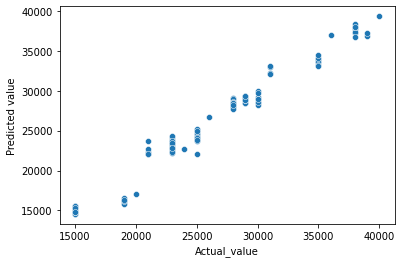

In [75]:

model_1=LinearRegression()
#Default Parameters here are 
#1) fit_intercept which is defaulty set to True. Which means it checkes whether to calculate intercept or not. 
#If it is given false it wont calculate intercept and data is expected to be centered.
#2) This will be default fault, if it is give True the Regressor X will the normalized before Regression.
model_1.fit(X_train,y_train)
model_1_train_pred=model_1.predict(X_train)  #Predictng for train values
model_1_test_pred=model_1.predict(X_test)  #predicting for test values

#calculating Mean absolute percentage error for both train and test 
mape1=mean_absolute_percentage_error(model_1_train_pred,y_train) 
mape2=mean_absolute_percentage_error(model_1_test_pred,y_test)

print("The train_MAPE for LR model",mape1)
print("The test_MAPE for LRmodel",mape1)

#calculating Mean absolute error for both train and test 

r2_train=r2_score (y_train,model_1_train_pred)
r2_test=r2_score(y_test,model_1_test_pred)

print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)

#creating dataframe for actual and predicted values
LR_table=pd.DataFrame({'Predicted value': model_1_test_pred, 'Actual_value': y_test})
LR_table.head()

sns.scatterplot(data=LR_table, x="Actual_value", y="Predicted value")

In [76]:
LR_table.head()

,Predicted value,Actual_value
231,22801.639556,23000
688,23198.621342,23000
27,28347.240925,28000
366,23996.151979,23000
715,37236.015958,38000


**Observation:**From above output we can say that the result is not good because for the few prices the predicting value is not even closer to it. This is not right model for this dataset.

**RandomForestRegressor**

Default Parameters: 

**n_estimators:** This is the number of bossting stages that model has to perform. As the number increases the model will have better performance and the default parameter is 100.

**criterion:** This function to measure the quality of a split. The default criteria is squarred error.

**max_depth:** determines how deeply each tree is allowed to grow during any boosting round. The default values is none.

**min_samples_split:** This is the minimum number of samples required to split an internal node this can be of type int or float, If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split. The defualt value is 2

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. The defualt value is 1

The train_MAPE for RF  model 0.0016469454839011914
The test_MAPE for  RF model 0.0041058333510692
The R2_score  for train values 0.9993784375767258
The R2_score for test values 0.9951714805541069


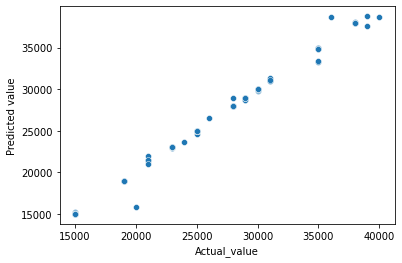

In [80]:
model_2=RandomForestRegressor()
model_2.fit(X_train,y_train)
model_2_train_pred=model_2.predict(X_train)  #Predictng for train values
model_2_test_pred=model_2.predict(X_test)  #predicting for test values

#calculating Mean absolute percentage error for both train and test

mape1=mean_absolute_percentage_error(model_2_train_pred,y_train)
mape2=mean_absolute_percentage_error(model_2_test_pred,y_test)
print("The train_MAPE for RF  model",mape1)
print("The test_MAPE for  RF model",mape2)

#calculating R2_Score value for both train and test 

r2_train=r2_score (y_train,model_2_train_pred)
r2_test=r2_score(y_test,model_2_test_pred)
print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)

#creating dataframe for actual and predicted values
RF_table=pd.DataFrame({'Predicted value': model_2_test_pred, 'Actual_value': y_test})
RF_table.head()

sns.scatterplot(data=RF_table, x="Actual_value", y="Predicted value")

In [79]:
RF_table.head(8)

,Predicted value,Actual_value
231,23000.0,23000
688,23000.0,23000
27,28000.0,28000
366,23000.0,23000
715,37860.0,38000
482,23000.0,23000
436,15000.0,15000
698,29000.0,29000


**Observation:** From the above the result seems very good as MAPE value is 0.004 and r2_score is 0.99 but let’s not conclude here we will check at other models as well.

**XGBRegressor**

Default parameters:

**Max_depth:** determines how deeply each tree is allowed to grow during any boosting round. The default values is 3.

**Learning Rate:** The learning rate shrinks the conntribution of each tree by learning rate and the default will be 0.1

**n_estimators:** This is the number of bossting stages that model has to perform. As the number increases the model will have better performance and the default parameter is 100.

These are the main parameter as we still have several parameters. These parameters can be used for hyper parameter tuning.

[09:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The train_MAPE for LR model 0.012108936814987377
The test_MAPE for LRmodel 0.014500334050526484
The R2_score  for train values 0.9942167758050079
The R2_score for test values 0.9896762617564292


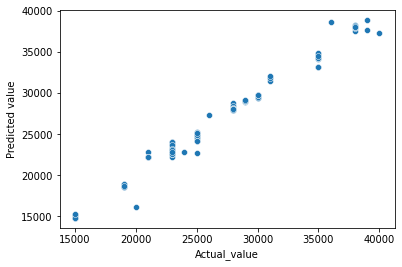

In [69]:
model_3=XGBRegressor()

model_3.fit(X_train,y_train)
model_3_train_pred=model_3.predict(X_train)  #Predictng for train values
model_3_test_pred=model_3.predict(X_test)  #predicting for test values
#calculating Mean absolute percentage error for both train and test 
mape1=mean_absolute_percentage_error(model_3_train_pred,y_train)
mape2=mean_absolute_percentage_error(model_3_test_pred,y_test)

print("The train_MAPE for XGB model",mape1)
print("The test_MAPE for XGB model",mape2)
#calculating R2_Score value for both train and test 
r2_train=r2_score (y_train,model_3_train_pred)
r2_test=r2_score(y_test,model_3_test_pred)

print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)

#creating dataframe for actual and predicted values
XGB_table=pd.DataFrame({'Predicted value': model_3_test_pred, 'Actual_value': y_test})
XGB_table.head()

sns.scatterplot(data=XGB_table, x="Actual_value", y="Predicted value")


In [82]:
XGB_table.head()

,Predicted value,Actual_value
231,22773.984375,23000
688,23844.615234,23000
27,28017.634766,28000
366,24076.410156,23000
715,37520.289062,38000


**Observation:**The results are okay because this is better than the Linear Regression model but as Random Forest model is giving better result than this so this is not right model for this problem.

**KNeighborsRegressor**

Default Parameters:

**n_neighbors** is Number of neighbors to use and defualt value is 5.

**weights:** Weight function used in prediction. Possible values: It can be either uniform or distancede the default=’uniform’ where **uniform** : uniform weights. All points in each neighborhood are weighted equally.
and **distance**: **weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

The train_MAPE for knn  model 0.013922200542679218
The test_MAPE for knn model 0.020356444334411267
The R2_score  for train values 0.9792695741754284
The R2_score for test values 0.9615919661958638


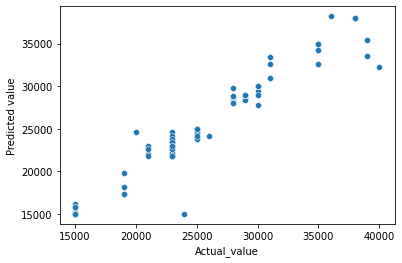

In [88]:
model_4=KNeighborsRegressor()

model_4.fit(X_train,y_train)
model_4_train_pred=model_4.predict(X_train)  #Predictng for train values
model_4_test_pred=model_4.predict(X_test)  #predicting for test values

#calculating Mean absolute percentage error for both train and test 
mape1=mean_absolute_percentage_error(model_4_train_pred,y_train)
mape2=mean_absolute_percentage_error(model_4_test_pred,y_test)

print("The train_MAPE for knn  model",mape1)
print("The test_MAPE for knn model",mape2)
#calculating R2_Score value for both train and test 
r2_train=r2_score (y_train,model_4_train_pred)
r2_test=r2_score(y_test,model_4_test_pred)

print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)


#creating dataframe for actual and predicted values
KNN_table=pd.DataFrame({'Predicted value': model_4_test_pred, 'Actual_value': y_test})
KNN_table.head()

sns.scatterplot(data=KNN_table, x="Actual_value", y="Predicted value")

In [89]:
KNN_table.head()

,Predicted value,Actual_value
231,23000.0,23000
688,23000.0,23000
27,28600.0,28000
366,24600.0,23000
715,38000.0,38000


**Observation:** Results are pretty  good but let’s not conclude here we will check at other models as well.

**ExtraTreesRegressor**

Default Parameters: 

**n_estimators:** This is the number of bossting stages that model has to perform. As the number increases the model will have better performance and the default parameter is 100.

**criterion:** This function to measure the quality of a split. The default criteria is squarred error.

**max_depth:** determines how deeply each tree is allowed to grow during any boosting round. The default values is none.

**min_samples_split:** This is the minimum number of samples required to split an internal node this can be of type int or float, If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split. The defualt value is 2

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. The defualt value is 1

The train_MAPE for ExtraTreesRegressor model 0.0
The test_MAPE for ExtraTreesRegressor model 0.005571121759022764
The R2_score  for train values 1.0
The R2_score for test values 0.9936336576532947


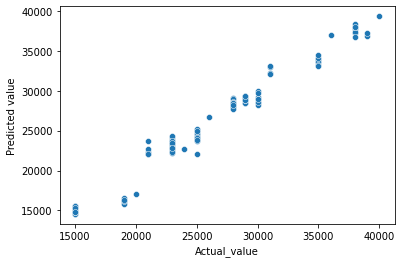

In [83]:
model_5=ExtraTreesRegressor()
model_5.fit(X_train,y_train)
model_5_train_pred=model_5.predict(X_train)  #Predictng for train values
model_5_test_pred=model_5.predict(X_test)  #predicting for test values
#calculating Mean absolute percentage error for both train and test 
mape1=mean_absolute_percentage_error(model_5_train_pred,y_train)
mape2=mean_absolute_percentage_error(model_5_test_pred,y_test)

print("The train_MAPE for ExtraTreesRegressor model",mape1)
print("The test_MAPE for ExtraTreesRegressor model",mape2)

#calculating R2_Score value for both train and test 

r2_train=r2_score (y_train,model_5_train_pred)
r2_test=r2_score(y_test,model_5_test_pred)

print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)

#creating dataframe for actual and predicted values
EXTR_table=pd.DataFrame({'Predicted value': model_5_test_pred, 'Actual_value': y_test})
EXTR_table.head()

sns.scatterplot(data=LR_table, x="Actual_value", y="Predicted value")

In [84]:
EXTR_table.head()

,Predicted value,Actual_value
231,23000.0,23000
688,23100.0,23000
27,28000.0,28000
366,23150.0,23000
715,38000.0,38000


**Observation:**The results look perfect let’s just look at other model results. This model can be perfect suitable for this Problem.

**SVR**

Default Parameters:

**kernel:** we have linear, poly, rbf, sigmoid, precomputed kernels. It Specifies the kernel type to be used in the algorithm. The default one is rbf.

**gamma:** this defines how far the influence of a single training example reaches, default=’scale’ Its is used when Kernel coefficient have ‘rbf’, ‘poly’ and ‘sigmoid’. The defualt is "Scale"

**C:** Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. Default value is 1.0

The train_MAPE for SVR model 0.21269900123227095
The test_MAPE for SVR model 0.20790316470834988
The R2_score  for train values -0.02386717273477701
The R2_score for test values -0.060259649320880904


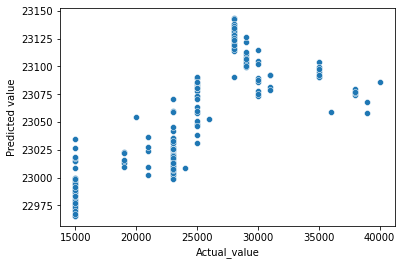

In [86]:
model_6=SVR()
model_6.fit(X_train,y_train)
model_6_train_pred=model_6.predict(X_train)  #Predictng for train values
model_6_test_pred=model_6.predict(X_test)  #predicting for test values
#calculating Mean absolute percentage error for both train and test 
mape1=mean_absolute_percentage_error(model_6_train_pred,y_train)
mape2=mean_absolute_percentage_error(model_6_test_pred,y_test)

print("The train_MAPE for SVR model",mape1)
print("The test_MAPE for SVR model",mape2)

#calculating R2_Score value for both train and test 

r2_train=r2_score (y_train,model_6_train_pred)
r2_test=r2_score(y_test,model_6_test_pred)

print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)

#creating dataframe for actual and predicted values
svr_table=pd.DataFrame({'Predicted value': model_6_test_pred, 'Actual_value': y_test})
svr_table.head()

sns.scatterplot(data=svr_table, x="Actual_value", y="Predicted value")

In [87]:
svr_table.head()

,Predicted value,Actual_value
231,23004.560420,23000
688,23041.908484,23000
27,23125.493842,28000
366,23070.661074,23000
715,23077.262787,38000


Observation: The result is very bad as this model is giving r2_Score in negatives. This model is not suitable for this problem.

**Hyper Parameter Tuning**

Now we have ExtraTreeRegressor which is very much suitable for this dataset let’s try to do hyper Parameter tuning to that and check if we can improve the model

In [92]:
#Innitialising the Parameters
parameters={ "max_depth" : [3,5,7,9],
            "n_estimators": [300,350,400,450]
             }

In [96]:
tuning_model=GridSearchCV(ExtraTreesRegressor(),param_grid=parameters,scoring='neg_mean_absolute_percentage_error',verbose=3)
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....max_depth=3, n_estimators=300;, score=-0.029 total time=   0.7s
[CV 2/5] END ....max_depth=3, n_estimators=300;, score=-0.025 total time=   0.7s
[CV 3/5] END ....max_depth=3, n_estimators=300;, score=-0.028 total time=   0.6s
[CV 4/5] END ....max_depth=3, n_estimators=300;, score=-0.027 total time=   0.7s
[CV 5/5] END ....max_depth=3, n_estimators=300;, score=-0.027 total time=   0.7s
[CV 1/5] END ....max_depth=3, n_estimators=350;, score=-0.028 total time=   0.8s
[CV 2/5] END ....max_depth=3, n_estimators=350;, score=-0.025 total time=   0.8s
[CV 3/5] END ....max_depth=3, n_estimators=350;, score=-0.028 total time=   0.6s
[CV 4/5] END ....max_depth=3, n_estimators=350;, score=-0.027 total time=   0.4s
[CV 5/5] END ....max_depth=3, n_estimators=350;, score=-0.027 total time=   0.4s
[CV 1/5] END ....max_depth=3, n_estimators=400;, score=-0.029 total time=   0.5s
[CV 2/5] END ....max_depth=3, n_estimators=400;,

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [300, 350, 400, 450]},
             scoring='neg_mean_absolute_percentage_error', verbose=3)

In [97]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 9, 'n_estimators': 350}

In [98]:
tuned_hyper_model=ExtraTreesRegressor(max_depth=9, n_estimators=350)
tuned_hyper_model.fit(X_train,y_train)
tunedmodel_train_pred=tuned_hyper_model.predict(X_train)  #Predictng for train values
tunedmodel_test_pred=tuned_hyper_model.predict(X_test)  #predicting for test values
tunedmodel_table=pd.DataFrame({'Predicted value':tunedmodel_test_pred, 'Actual_value': y_test})

The train_MAPE for ExtraTreesRegressor model 0.0020699183306142847
The test_MAPE for ExtraTreesRegressor model 0.006566192829508732
The R2_score  for train values 0.9993873968937947
The R2_score for test values 0.9932288498259727


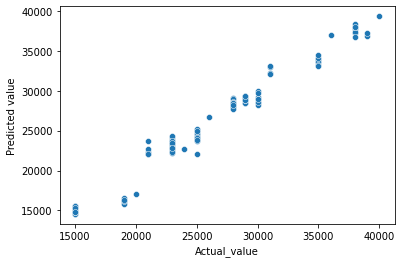

In [101]:
#calculating Mean absolute percentage error for both train and test 
mape1=mean_absolute_percentage_error(tunedmodel_train_pred,y_train)
mape2=mean_absolute_percentage_error(tunedmodel_test_pred,y_test)

print("The train_MAPE for ExtraTreesRegressor model",mape1)
print("The test_MAPE for ExtraTreesRegressor model",mape2)

#calculating R2_Score value for both train and test 

r2_train=r2_score (y_train,tunedmodel_train_pred)
r2_test=r2_score(y_test,tunedmodel_test_pred)

print("The R2_score  for train values" ,r2_train)
print("The R2_score for test values",r2_test)

#creating dataframe for actual and predicted values
EXTR_table=pd.DataFrame({'Predicted value': tunedmodel_test_pred, 'Actual_value': y_test})


sns.scatterplot(data=LR_table, x="Actual_value", y="Predicted value")

In [103]:
EXTR_table.head(5)

,Predicted value,Actual_value
231,22990.332073,23000
688,23287.133151,23000
27,28005.415183,28000
366,23241.983137,23000
715,38000.000000,38000


From above output we can say that there is no much change in the results, but one observation is that the difference between train error and test error is reduced. If we need still good model then we need to increase the number of samples for those premium prices which have very little number of counts.